Statistical thinking Intro

In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv")
print(df.head())
print(df.species.describe())
# Set default Seaborn style
sns.set()



   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
count           150
unique            3
top       virginica
freq             50
Name: species, dtype: object


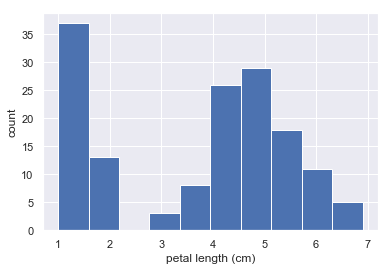

In [3]:
# Plot histogram of versicolor petal lengths
_=plt.hist(df['petal_length'])
_=plt.xlabel('petal length (cm)')
_=plt.ylabel('count')
# Show histogram
plt.show()

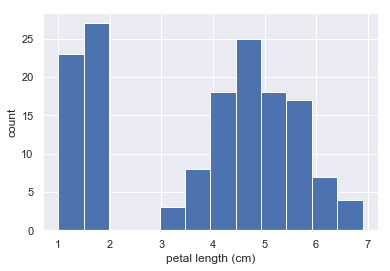

In [4]:
#To set the no. of bins based on the no. of data points
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data=len(df["petal_length"])

# Number of bins is the square root of number of data points: n_bins
n_bins=np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins=int(n_bins)

# Plot the histogram
_=plt.hist(df["petal_length"], bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()


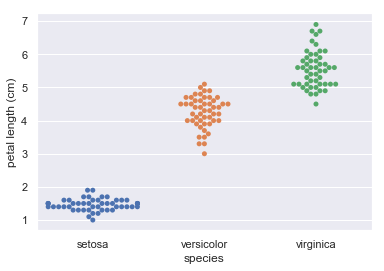

In [5]:
# Create bee swarm plot with Seaborn's default settings
"""Draw a categorical scatterplot with non-overlapping points.
This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) 
so that they don’t overlap. This gives a better representation of the distribution of values, but it does
not scale well to large numbers of observations. """

_ = sns.swarmplot(x='species', y='petal_length', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
# Show the plot
plt.show()

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements.(Empirical cumulative distribution function)
     x axis—sorted data; y evenly spaced ranges with a max of 1"""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y
#ecdf(df["petal_length"])

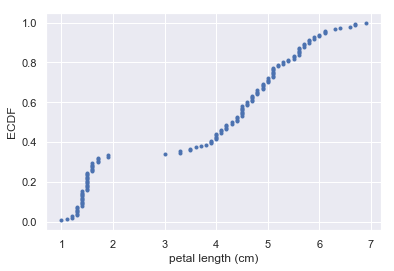

In [7]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(df["petal_length"])

# Generate plot
plt.plot(x_vers,y_vers,marker='.',linestyle='none')

# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')


# Display the plot
plt.show()


In [8]:
""" subset by species failed, you could help me to solve this, I would have wanted to crearte a series from
1 column of a data frame, for only the entries of respective species"""
#df_set=df[df['species'].str.match('setosa')]
#set_length=df_set.loc[:,['petal_length']]
#df_set.as_matrix(columns=df_set.columns[1:])
#setosa=set_length.to_numpy()
setosa = np.array([1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5,1.7,1.5,1,1.7,1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,1.3,1.5,1.3,1.5,1.3,1.3,1.3,1.6,1.9,1.4,1.6,1.4,1.5,1.4])
versicolor= np.array([4.7,4.5,4.9,4,4.6,4.5,4.7,3.3,4.6,3.9,3.5,4.2,4,4.7,3.6,4.4,4.5,4.1,4.5,3.9,4.8,4,4.9,4.7,4.3,4.4,4.8,5,4.5,3.5,3.8,3.7,3.9,5.1,4.5,4.5,4.7,4.4,4.1,4,4.4,4.6,4,3.3,4.2,4.2,4.2,4.3,3,4.1])
virginica= np.array([6,5.1,5.9,5.6,5.8,6.6,4.5,6.3,5.8,6.1,5.1,5.3,5.5,5,5.1,5.3,5.5,6.7,6.9,5,5.7,4.9,6.7,4.9,5.7,6,4.8,4.9,5.6,5.8,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,4.8,5.4,5.6,5.1,5.1,5.9,5.7,5.2,5,5.2,5.4,5.1
])

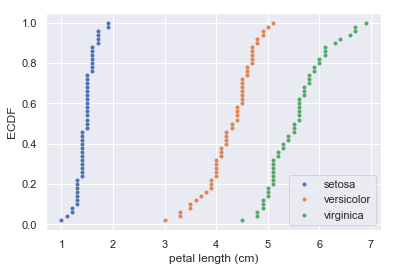

In [9]:
# Compute ECDFs
x_set, y_set=ecdf(setosa)
x_vers, y_vers=ecdf(versicolor)
x_virg, y_virg=ecdf(virginica)

# Plot all ECDFs on the same plot
plt.plot(x_set, y_set,marker='.',linestyle='none')
plt.plot(x_vers, y_vers, marker='.',linestyle='none')
plt.plot(x_virg, y_virg, marker='.',linestyle='none')



# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [11]:
print(np.mean(versicolor)) #heavily influenced by outliers
print(np.median(versicolor)) # median is supposed to be "immune" to extreme data points. it is based on ranking. aka as 50th percentile

4.26
4.35


Percentiles, outliers, and box plots

box plot line in the middle =50th percentile/median
top and bottom edge of the box is 75th and 25th percentile, respectively
the extension of the box is the interquartile range (IQR)
whiskers "min" or 25th percentile -1.5*IQR and "max" or 75th percentile +1.5*IQR---whichever is less from the two options
outliers (usually from 2IQR on) as dots, stars etc.
extreme values vs errors...

In [12]:
np.percentile(virginica, [25,50,75])

array([5.1  , 5.55 , 5.875])

In [14]:
# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers=np.percentile(versicolor,percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


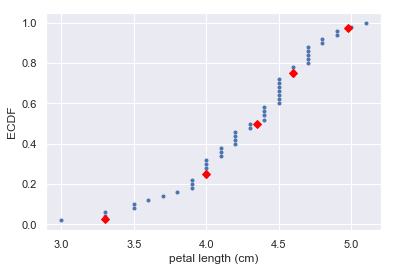

In [15]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


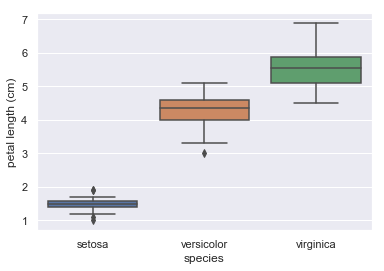

In [18]:
# Create box plot with Seaborn's default settings

_ = sns.boxplot(x='species', y='petal_length', data=df)
# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')


# Show the plot
plt.show()


Variance: average of the squared distance from the mean
standard deviation (SD): square root of the variance, you need this so the units match with the original data

In [19]:
print(np.var(versicolor))
print(np.std(versicolor)) #'typical spread of the data'

0.21640000000000004
0.4651881339845203


Covariance: calculates difference from the mean from both variables for every data point-->covariance the mean of the product of the two values

Pearson correlation coefficient: covariance stripped from the dimensions of x and y ((covariance/(stdX*stdY))
variability due to codependence compared to the inherent variance, value range from -1 to 1
positive vs negative correlation


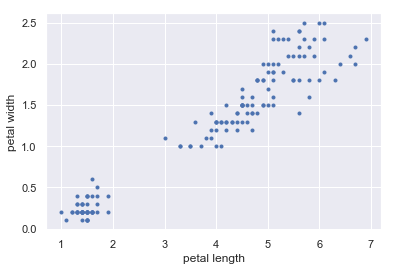

In [21]:
# Make a scatter plot
_ = plt.plot(df['petal_length'], df['petal_width'], marker='.', linestyle='none')


# Label the axes

_ = plt.xlabel('petal length')

_ = plt.ylabel('petal width')

In [26]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix=np.cov(df['sepal_length'], df['sepal_width'])

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of sepals:sepal_cov
sepal_cov=covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)



[[ 0.68569351 -0.03926846]
 [-0.03926846  0.18800403]]
-0.03926845637583893


In [27]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r= pearson_r(df['sepal_length'], df['sepal_width'])

# Print the result
print(r)

-0.10936924995064937


Probabilistic logic: allows us to describe uncertainty
'what you might expect, if data was collected again'
you measure a sample but want to draw conclusion for the whole population based on it
and statistical inference

hacker statistics to stimulate data collection
same seed will give the same sequence of 'random' numbers


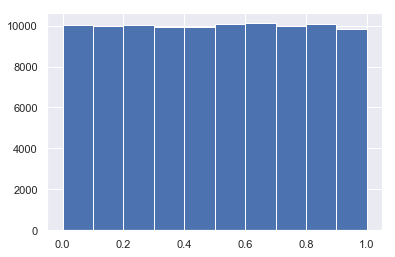

In [28]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


In [29]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number=np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


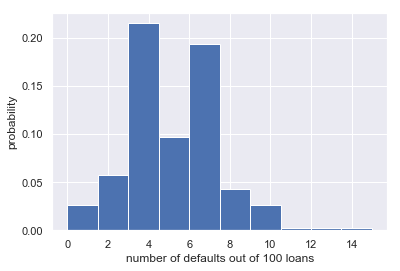

In [30]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults=np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

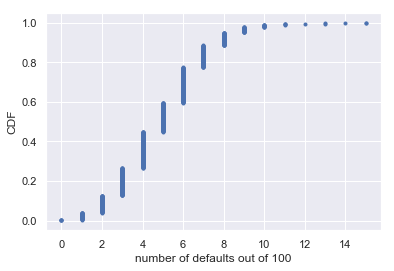

Probability of losing money = 0.022


In [32]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


The Binomial distribution
probability mass function (PMF)
discrete vs continous variables
CDF??

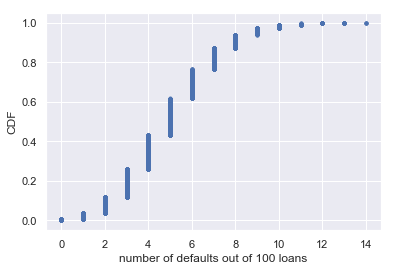

In [33]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults=np.random.binomial(100,0.05, size=10000)

# Compute CDF: x, y
x,y=ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('CDF')

# Show the plot
plt.show()
